In [1]:
#compare the CV values of czechowski et al 2005 (microarray) and those from the RNA-seq in Mergner et al 2020

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# def make_plot(df,x_variable, y_variable,x_label, y_label, output_prefix, plot_kind):
#     """function to make and save plot"""
#     #allow colour codes in seaborn
#     sns.set(color_codes=True)
#     sns.set_style("whitegrid")
#     #plot
#     plot = sns.catplot(x=x_variable, y=y_variable, data=df, kind=plot_kind)
#     #plot points
#     ax = sns.swarmplot(x=x_variable, y=y_variable, data=df, color=".25")
#     #change axes labels
#     plt.ylabel(y_label)
#     plt.xlabel(x_label)
#     #save figure
#     ax.get_figure().savefig(f'../../data/output/{file_names}/{dependent_variable}/plots/{output_prefix}_{plot_kind}.pdf', format='pdf')   

In [19]:
def all_prom_distribution(df, x_variable, x_label, df2=pd.DataFrame(),df1_label='', df2_label=''):
    """function to return distribution plot of all promoters GC content. 
    df1_label and df2 labels are the names of the respective gene type subset in the df"""
    #if only 1 dataframe provided then create just 1 plot
    if df2.empty:    
        dist_plot = df[x_variable]
        #create figure with no transparency
        dist_plot_fig = sns.distplot(dist_plot).get_figure()
        plt.xlabel(x_label)
    #else if 2 dataframes provided plot them on the same axes
    else:
        dist_plot1 = df[x_variable]
        dist_plot2 = df2[x_variable]
        sns.distplot(dist_plot1,hist=False, rug=True,label=df1_label)
        sns.distplot(dist_plot2,hist=False, rug=True,label=df2_label).get_figure()
        #create legend
        plt.legend()

    #save to file
    #dist_plot_fig.savefig(f'../../data/output/{file_names}/{dependent_variable}/plots/{output_prefix}_distribution.pdf', format='pdf')    

In [3]:
#location of files
czechowski = '../../data/output/non-overlapping_includingbidirectional_all_genes_newannotation/genes/promoters_5UTR_czechowski_constitutive_variable_random.txt'
czechowski_all = '../../data/output/non-overlapping_includingbidirectional_all_genes_newannotation/genes/promoters_5UTR_czechowski_allfilteredgenes.txt'
mergner = '../../data/output/non-overlapping_includingbidirectional_all_genes_newannotation/genes/promoters_5UTR_mergner_constitutive_variable_random.txt'
mergner_all = '../../data/output/non-overlapping_includingbidirectional_all_genes_newannotation/genes/promoters_5UTR_mergner_allfilteredgenes.txt'

In [4]:
#read in files to dfs
czechowski_df = pd.read_table(czechowski, sep='\t', header=None)
mergner_df = pd.read_table(mergner, sep='\t', header=None)
cols = ['AGI', 'gene_type']
czechowski_df.columns = cols
mergner_df.columns = cols

In [5]:
#read in all genes
czechowski_all_df = pd.read_table(czechowski_all, sep='\t', header=0)
mergner_all_df = pd.read_csv(mergner_all, sep='\t',header=0)

In [6]:
mergner_all_df

,chr,start,stop,AGI,dot1,strand,source,type,dot2,attributes,transcription_class,transcription_family,expression_CV,presence_in_araport11
0,1,30068518,30070022,AT1G79940,.,+,araport11,promoter,.,ID=gene:AT1G79940;Name=ERDJ2A;biotype=protein_...,NaN,NaN,0.181119,1.0
1,3,18488381,18489450,AT3G49850,.,+,araport11,promoter,.,ID=gene:AT3G49850;Name=TRB3;biotype=protein_co...,TF,MYB-related,0.211639,1.0
2,1,20186824,20188096,AT1G54080,.,-,araport11,promoter,.,ID=gene:AT1G54080;Name=UBP1A;biotype=protein_c...,NaN,NaN,0.214741,1.0
3,1,28630789,28631403,AT1G76320,.,+,araport11,promoter,.,ID=gene:AT1G76320;Name=FRS4;biotype=protein_co...,TF,FAR1,0.215190,1.0
4,3,5455942,5456512,AT3G16090,.,+,araport11,promoter,.,ID=gene:AT3G16090;Name=HRD1A;biotype=protein_c...,NaN,NaN,0.216473,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17642,3,977474,978264,AT3G03826,.,+,araport11,promoter,.,ID=gene:AT3G03826;biotype=protein_coding;descr...,NaN,NaN,5.385165,1.0
17643,4,6618426,6618675,AT4G10740,.,-,araport11,promoter,.,ID=gene:AT4G10740;biotype=protein_coding;descr...,NaN,NaN,5.385165,1.0
17644,3,10358116,10359281,AT3G27910,.,-,araport11,promoter,.,ID=gene:AT3G27910;biotype=protein_coding;descr...,NaN,NaN,5.385165,1.0
17645,5,19818947,19820352,AT5G48890,.,+,araport11,promoter,.,ID=gene:AT5G48890;Name=LATE;biotype=protein_co...,NaN,NaN,5.385165,1.0


In [9]:
#how many constitutive genes in both mergner and czechowski constitutive sets?
inboth = czechowski_df[czechowski_df.AGI.isin(mergner_df.AGI)]
len(inboth[inboth.gene_type == 'constitutive'])

15

In [10]:
#how many variable genes in both mergner and czechowski constitutive sets?
len(inboth[inboth.gene_type == 'variable'])

0

In [11]:
#how many control genes in both mergner and czechowski constitutive sets?
len(inboth[inboth.gene_type == 'random'])

0

In [12]:
mergner_df

,AGI,gene_type
0,AT1G79940,constitutive
1,AT3G49850,constitutive
2,AT1G54080,constitutive
3,AT1G76320,constitutive
4,AT3G16090,constitutive
...,...,...
295,AT5G52500,control
296,AT3G45800,control
297,AT1G34500,control
298,AT4G39250,control


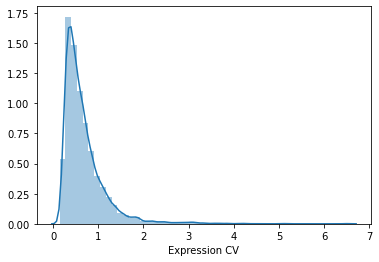

In [13]:
#all czechowski CV distribution plot
all_prom_distribution(czechowski_all_df,'expression_CV', 'Expression CV')

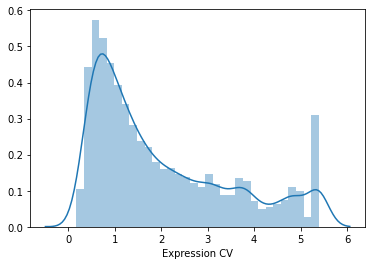

In [14]:
#all mergner CV distribution plot
all_prom_distribution(mergner_all_df,'expression_CV', 'Expression CV')

In [31]:
#plot CV from RNA-seq for top variable and top constitutive genes from microarray'
merged = pd.merge(czechowski_df,mergner_all_df, on='AGI', how='left')

/home/witham/opt/anaconda3/envs/PromoterArchitecturePipeline/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


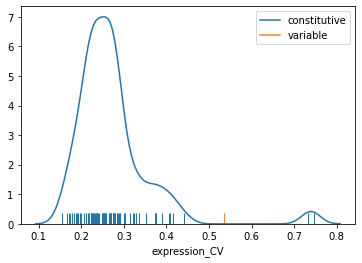

In [46]:
#using CVs from RNA-seq for top variable and top constitutive genes from microarray'
#plot microarray constitutive gene CVs and plot variable CVs
#merge dfs
merged2 = pd.merge(mergner_df,czechowski_all_df, on='AGI', how='left')
#ONLY 134 GENES FROM RNA-SEQ SET ARE IN THE MICROARRAY SET
#86 constitutive genes from RNA-seq in microarray
#1 variable genes from RNA-seq in microarray
#47 control genes from RNA-seq in microarray
all_prom_distribution(merged2[merged2.gene_type == 'constitutive'],'expression_CV', 'Expression CV', merged2[merged2.gene_type == 'variable'], df1_label='constitutive',df2_label='variable')

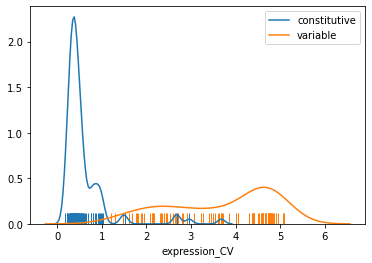

In [47]:
#using CVs from microarray for top variable and top constitutive genes from RNA-seq'
#plot microarray constitutive gene CVs and plot variable CVs
all_prom_distribution(merged[merged.gene_type == 'constitutive'],'expression_CV', 'Expression CV', merged[merged.gene_type == 'variable'], df1_label='constitutive',df2_label='variable')
#Indeed constitutive genes set from the microarray have lower RNA-seq CVs than variable gene set

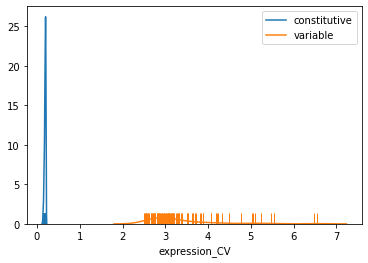

In [21]:
#czechovski CV distribution
#using CVs and gene categories from only the microarray, plot CVs of the constitutive and variable gene sets
merged_czechowski =pd.merge(czechowski_df,czechowski_all_df, on='AGI', how='left')
all_prom_distribution(merged_czechowski[merged_czechowski.gene_type == 'constitutive'],'expression_CV', 'Expression CV',merged_czechowski[merged_czechowski.gene_type == 'variable'],df1_label='constitutive',df2_label='variable')

/home/witham/opt/anaconda3/envs/PromoterArchitecturePipeline/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


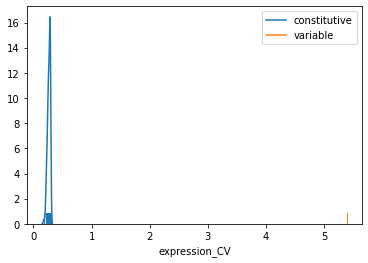

In [28]:
#mergner CV distribution
#using CVs and gene categories from only the RNA-seq data, plot CVs of the constitutive and variable gene sets
merged_mergner =pd.merge(mergner_df,mergner_all_df, on='AGI', how='left')
all_prom_distribution(merged_mergner[merged_mergner.gene_type == 'constitutive'],'expression_CV', 'Expression CV',merged_mergner[merged_mergner.gene_type == 'variable'],df1_label='constitutive',df2_label='variable')
#all variable genes have a CV of 5.385165

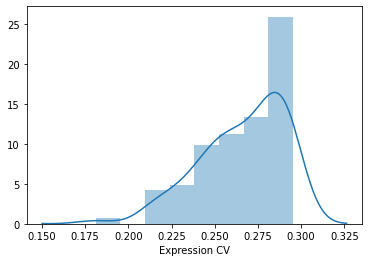

In [18]:
#distribution of only constitutive gene CVs (both gene categories and CVs from RNA-seq data)
all_prom_distribution(merged_mergner[merged_mergner.gene_type == 'constitutive'],'expression_CV', 'Expression CV')

/home/witham/opt/anaconda3/envs/PromoterArchitecturePipeline/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


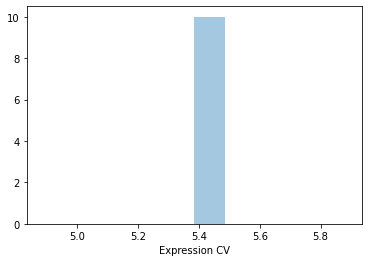

In [19]:
#distribution of only variable gene CVs (both gene categories and CVs from RNA-seq data)
all_prom_distribution(merged_mergner[merged_mergner.gene_type == 'variable'],'expression_CV', 'Expression CV')
#all variable genes have a CV of 5.385165